## Подготовка данных

### Загрузка датасета

In [16]:
from sklearn.datasets import fetch_openml
mnist_x, mnist_y = fetch_openml('mnist_784', return_X_y=True, as_frame=True, parser = 'pandas')

In [17]:
print("X shape:", mnist_x.shape, ", Y shape:", mnist_y.shape)

X shape: (70000, 784) , Y shape: (70000,)


In [22]:
import numpy as np

data_type = np.float32
n_train = 60000 
n_test = 10000

train_x = np.ascontiguousarray(mnist_x.values[:n_train], dtype=data_type)
train_y = np.ascontiguousarray(mnist_y.values[:n_train], dtype=int)
test_x = np.ascontiguousarray(mnist_x.values[n_train:], dtype=data_type)
test_y = np.ascontiguousarray(mnist_y.values[n_train:], dtype=int)

assert test_x.shape[0] == n_test, "Incorrect test_x shape"
assert test_y.shape[0] == n_test, "Incorrect test_y shape"

print(f'Train: x shape = {train_x.shape}, y shape = {train_y.shape} \n Test: x shape = {test_x.shape}, y shape = {test_y.shape}')

Train: x shape = (60000, 784), y shape = (60000,) 
 Test: x shape = (10000, 784), y shape = (10000,)


### Проверка данных

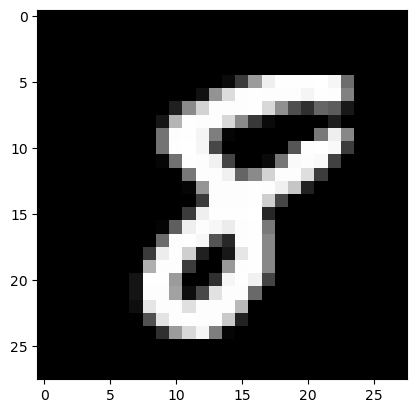

Class:  8
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  10.  59. 156. 239. 254. 254. 254. 255. 246. 109.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  17. 147.
 220. 253. 254. 253. 253. 253. 245. 254. 253. 129.   0.   0.   0.  

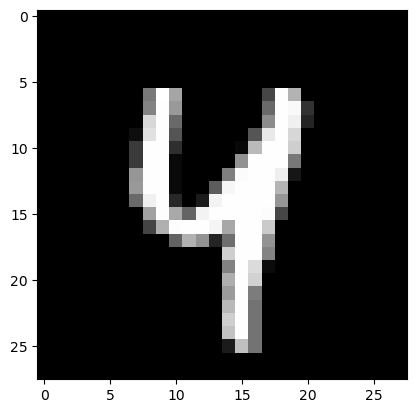

Class:  4
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0. 121. 255. 165.   0.   0.   0.
   0.   0.   0.  70. 254. 179.   0.   0.   0.   0.   0.   0.   0.  

In [23]:
import matplotlib.pyplot as plt
# Цифра из тренировочной выборки
id = 777
plt.imshow(np.reshape(train_x[id], (-1,28)), cmap = 'gray')
plt.show()
print("Class: ", train_y[id])
print(train_x[id])

# Цифра из тестовой выборки
id = 42
plt.imshow(np.reshape(test_x[id], (-1,28)), cmap = 'gray')
plt.show()
print("Class: ", test_y[id])
print(test_x[id])

### Предобработка данных

In [24]:
from sklearn.preprocessing import MinMaxScaler
# one-hot encoding меток, например 5 -> [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
n_classes = 10
train_y = np.identity(n_classes)[train_y] 
test_y = np.identity(n_classes)[test_y]

# Приводим значения x к диапазону от 0 до 1
scaler = MinMaxScaler(feature_range=(0,1)).fit(train_x)
train_x = scaler.transform(train_x)
test_x = scaler.transform(test_x)

## Построение архитектуры сети

In [27]:
from time import time
import logging
import sys
import time

def get_accuracy(pred_u, true_y):
        true_labels = np.argmax(true_y, axis=1)
        predicted_labels = np.argmax(pred_u, axis=1)
        true_predicted_labels = true_labels == predicted_labels
        return true_predicted_labels.sum()/true_y.shape[0]

class FCNN:
    def __init__(self, input_layer_size, hidden_layer_size, output_layer_size):
        self.input_layer_size = input_layer_size
        self.hidden_layer_size = hidden_layer_size
        self.output_layer_size = output_layer_size
        
        self.weights = {"input_hidden":np.sqrt(5 / (hidden_layer_size + input_layer_size)) * np.random.randn(input_layer_size, hidden_layer_size), 
                        "hidden_output": np.sqrt(5 / (hidden_layer_size + input_layer_size)) * np.random.randn(hidden_layer_size, output_layer_size)} 

        self.biases = {"hidden": np.zeros(hidden_layer_size), "output": np.zeros(output_layer_size)}
        self.hidden_layer = {"signal": np.zeros(hidden_layer_size), "activation": np.zeros(hidden_layer_size)}
        self.output_layer = {"signal": np.zeros(output_layer_size), "activation": np.zeros(output_layer_size)} 
        
        self.weights_update = {"input_hidden": np.ndarray((input_layer_size, hidden_layer_size), np.float32), 
                               "hidden_output": np.ndarray((hidden_layer_size, output_layer_size), np.float32)}
        self.biases_update = {"hidden": np.ndarray((1, hidden_layer_size), np.float32), 
                              "output": np.ndarray((1, output_layer_size), np.float32)}
        
        
        self.delta_output = np.zeros(output_layer_size)
        self.delta_hidden_act = np.zeros(hidden_layer_size)
        self.delta_hidden =  np.zeros(hidden_layer_size) 
      
    def relu(self, u):
        return np.maximum(0, u)

    def softmax(self, u):
        exp_x = np.exp(u)
        return exp_x / np.sum(exp_x, axis=1, keepdims=True)

    def relu_der(self, u):
        return np.where(u > 0, 1, 0)
     
    def forward(self, x):
        self.hidden_layer["signal"] = np.matmul(x, self.weights["input_hidden"]) + self.biases["hidden"]
        self.hidden_layer["activation"] = self.relu(self.hidden_layer["signal"])
        self.output_layer["signal"] = np.matmul(self.hidden_layer["activation"], self.weights["hidden_output"]) + self.biases["output"]
        self.output_layer["activation"] = self.softmax(self.output_layer["signal"])    
            
    def backward(self, x, y, lr):
        self.delta_output = self.output_layer["activation"] - y  
        self.weights_update["hidden_output"] = np.matmul(self.hidden_layer["activation"].T, self.delta_output)
        self.biases_update ["output"] = np.sum(self.delta_output, axis=0, keepdims=True)
        
        self.delta_hidden = np.matmul(self.delta_output, self.weights["hidden_output"].T) * self.relu_der(self.hidden_layer["signal"]) 
        self.weights_update["input_hidden"] = np.matmul(x.T, self.delta_hidden)
        self.biases_update["hidden"] = np.sum(self.delta_hidden, axis=0, keepdims=True)

        self.weights["input_hidden"] = self.weights["input_hidden"] - lr / x.shape[0] * self.weights_update["input_hidden"]
        self.weights["hidden_output"] = self.weights["hidden_output"] - lr / x.shape[0] * self.weights_update["hidden_output"]
        
        self.biases["hidden"] = self.biases["hidden"] - lr / x.shape[0] * self.biases_update["hidden"] 
        self.biases["output"] = self.biases["output"] - lr / x.shape[0] * self.biases_update["output"]

    def make_prediction(self, x):   
        self.forward(x)
        return self.output_layer["activation"]
    
    def train(self, x, y, batch_size, n_epoch, lr):
        n_elements = x.shape[0]
        n_batches = int(n_elements/batch_size)
        training_time = []

        for epoch in range(n_epoch):
            start_epoch = time.perf_counter()
            first_batch_el = 0
            batch_id = 0
            while (batch_id < n_batches + 1):
                if (first_batch_el + batch_size < n_elements):
                    last_batch_el = first_batch_el + batch_size
                else:
                    last_batch_el = n_elements
                x_batch = x[first_batch_el : last_batch_el]
                y_batch = y[first_batch_el : last_batch_el]

                self.forward(x_batch)
                self.backward(x_batch, y_batch, lr)
                if (first_batch_el + batch_size <= n_elements):
                    first_batch_el += batch_size
                else:
                    first_batch_el = last_batch_el + 1
                batch_id+=1    
            end_epoch = time.perf_counter()
            training_time.append(end_epoch - start_epoch)
            self.forward(x)
            accuracy = get_accuracy(self.output_layer["activation"], y)
            print(f'Epoch #{epoch+1}: Time {training_time[epoch]:0.2f} sec, Train error {1-accuracy:0.5f}, Train accuracy {accuracy:0.5f}')
        print(f"Total training time: {sum(training_time):0.2f} sec ")
    


## Обучение сети

### Создание модели

In [28]:
input_layer_size = 28 * 28
hidden_layer_size = 300
output_layer_size = 10

model = FCNN (input_layer_size,
                  hidden_layer_size,
                  output_layer_size)

### Тренировка модели

In [32]:
batch_size = 64
n_epoch = 20
lr = 0.1

model.train(train_x, train_y, batch_size, n_epoch, lr)

Epoch #1: Time 3.18 sec, Train error 0.00368, Train accuracy 0.99632
Epoch #2: Time 2.56 sec, Train error 0.00325, Train accuracy 0.99675
Epoch #3: Time 2.62 sec, Train error 0.00292, Train accuracy 0.99708
Epoch #4: Time 2.81 sec, Train error 0.00268, Train accuracy 0.99732
Epoch #5: Time 7.02 sec, Train error 0.00222, Train accuracy 0.99778
Epoch #6: Time 3.73 sec, Train error 0.00198, Train accuracy 0.99802
Epoch #7: Time 7.82 sec, Train error 0.00162, Train accuracy 0.99838
Epoch #8: Time 3.23 sec, Train error 0.00145, Train accuracy 0.99855
Epoch #9: Time 6.82 sec, Train error 0.00127, Train accuracy 0.99873
Epoch #10: Time 7.67 sec, Train error 0.00110, Train accuracy 0.99890
Epoch #11: Time 2.89 sec, Train error 0.00090, Train accuracy 0.99910
Epoch #12: Time 5.67 sec, Train error 0.00082, Train accuracy 0.99918
Epoch #13: Time 2.81 sec, Train error 0.00073, Train accuracy 0.99927
Epoch #14: Time 2.98 sec, Train error 0.00067, Train accuracy 0.99933
Epoch #15: Time 5.29 sec, Tra

### Оценка точности на тестовой выборке

In [33]:
start_prediction = time.perf_counter()
classification_result = model.make_prediction(test_x)
end_prediction = time.perf_counter()
accuracy = get_accuracy(classification_result, test_y)

print(f'Test error: {1-accuracy:0.5f} \nTest accuracy: {accuracy:0.5f}\nTest time: {end_prediction-start_prediction:0.2f} sec')

Test error: 0.01950 
Test accuracy: 0.98050
Test time: 0.10 sec


## Реализация модели средствами PyTorch

In [39]:
import torch
from torch import nn

class pytorch_model(nn.Module):
    def __init__(self, input_layer_size, hidden_layer_size, output_layer_size):
        super().__init__()
        self.linear1 = nn.Linear(input_layer_size, hidden_layer_size)
        self.activation = nn.ReLU()
        self.linear2 = nn.Linear(hidden_layer_size, output_layer_size)
    def forward(self, x):
        out = self.linear1(x)
        out = self.activation(out)
        out = self.linear2(out)
        return out

In [40]:
input_layer_size = 28 * 28
hidden_layer_size = 300
output_layer_size = 10

torch_model = pytorch_model(input_layer_size, hidden_layer_size, output_layer_size)
print(torch_model)

pytorch_model(
  (linear1): Linear(in_features=784, out_features=300, bias=True)
  (activation): ReLU()
  (linear2): Linear(in_features=300, out_features=10, bias=True)
)


In [41]:
from torch.autograd import Variable
import time

batch_size = 64
n_epoch = 20
lr = 0.1 

n_elements = train_x.shape[0]
n_batches = int(n_elements/batch_size)
training_time = []

loss_function = nn.CrossEntropyLoss() 
optimizer = torch.optim.SGD(torch_model.parameters(), lr = lr) 

print("PyTorch model training")
for epoch in range(n_epoch):
    start_epoch = time.perf_counter()
    first_batch_el = 0
    batch_id = 0
    while (batch_id < n_batches + 1):
        if (first_batch_el + batch_size < n_elements):
            last_batch_el = first_batch_el + batch_size
        else:
            last_batch_el = n_elements
        x_batch = train_x[first_batch_el : last_batch_el]
        y_batch = train_y[first_batch_el : last_batch_el]      
        
        x_variable = Variable(torch.tensor(x_batch))
        y_variable = Variable(torch.tensor(y_batch))

        outputs = torch_model(x_variable) 
        loss = loss_function(outputs, y_variable)
        optimizer.zero_grad() 
        loss.backward() 
        optimizer.step()
        
        if (first_batch_el + batch_size <= n_elements):
            first_batch_el += batch_size
        else:
            first_batch_el = last_batch_el + 1
        batch_id+=1    
    end_epoch = time.perf_counter()
    training_time.append(end_epoch - start_epoch)
    
    accuracy = get_accuracy(torch_model(torch.tensor(train_x)).detach().numpy(), train_y)
    print(f'Epoch #{epoch+1}: Time {training_time[epoch]:0.2f} sec, Train error {1-accuracy:0.5f}, Train accuracy {accuracy:0.5f}')

print(f"Total training time: {sum(training_time):0.2f} sec ")    
        
        

PyTorch model training
Epoch #1: Time 37.47 sec, Train error 0.07678, Train accuracy 0.92322
Epoch #2: Time 33.54 sec, Train error 0.05317, Train accuracy 0.94683
Epoch #3: Time 35.74 sec, Train error 0.04077, Train accuracy 0.95923
Epoch #4: Time 32.31 sec, Train error 0.03282, Train accuracy 0.96718
Epoch #5: Time 30.45 sec, Train error 0.02797, Train accuracy 0.97203
Epoch #6: Time 33.79 sec, Train error 0.02440, Train accuracy 0.97560
Epoch #7: Time 27.77 sec, Train error 0.02095, Train accuracy 0.97905
Epoch #8: Time 33.36 sec, Train error 0.01815, Train accuracy 0.98185
Epoch #9: Time 28.08 sec, Train error 0.01590, Train accuracy 0.98410
Epoch #10: Time 26.88 sec, Train error 0.01423, Train accuracy 0.98577
Epoch #11: Time 36.14 sec, Train error 0.01263, Train accuracy 0.98737
Epoch #12: Time 32.14 sec, Train error 0.01148, Train accuracy 0.98852
Epoch #13: Time 42.23 sec, Train error 0.01042, Train accuracy 0.98958
Epoch #14: Time 31.41 sec, Train error 0.00970, Train accuracy 

Точность PyTorch модели на тестовых данных:

In [42]:
start_prediction = time.perf_counter()
classification_result = torch_model(torch.tensor(test_x)).detach().numpy()
end_prediction = time.perf_counter()
accuracy = get_accuracy(classification_result, test_y)

print(f'PyTorch model \nTest error: {1-accuracy:0.5f} \nTest accuracy: {accuracy:0.5f}\nTest time: {end_prediction-start_prediction:0.2f} sec')

PyTorch model 
Test error: 0.01990 
Test accuracy: 0.98010
Test time: 0.08 sec
